In [1]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Loading and exploring the data
penguins_df = pd.read_csv("penguins.csv")

penguins_df['sex'].value_counts()
penguins_df['sex_dummy'] = penguins_df['sex'].apply(lambda x : x == 'MALE').astype(int)
penguins_df['sex_dummy'].value_counts()

X = penguins_df.drop('sex', axis = 1).copy()
X_train,X_test = train_test_split(X, test_size = 0.2, random_state = 14)





C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

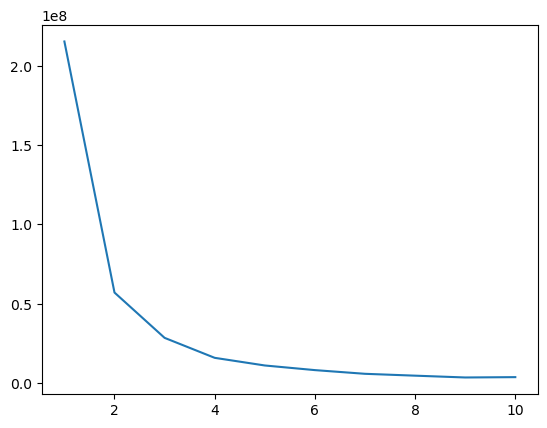

In [2]:

#Elbow Chart for figuring out number of clusters
standard_scaler = StandardScaler()
standard_scaler.fit_transform(X)

inertia_cluster = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia_cluster.append(kmeans.inertia_)

plt.plot(np.arange(1,11),inertia_cluster)
plt.show()

C:\Users\adith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


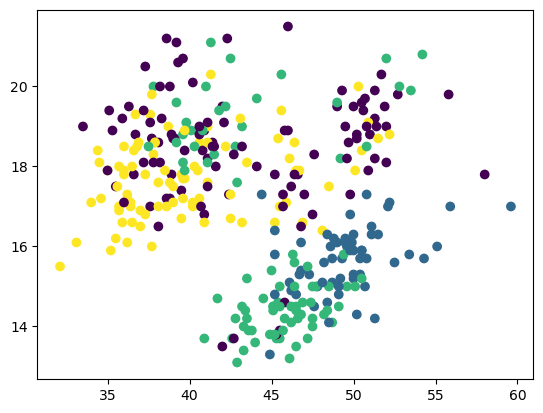

In [3]:
#optimal clustering
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.predict(X)
X['labels'] = labels

X.groupby('labels').mean()

plt.scatter(x = X['culmen_length_mm'], y = X['culmen_depth_mm'], c = X['labels'])
